## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9,0.8,0.7,0.6,0.5]

In [7]:
results = {}
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Moment = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MOMENTUM-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0730 23:00:26.248161  5320 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0730 23:00:26.250161  5320 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0730 23:00:26.276163  5320 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 23:00:26.277163  5320 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 23:00:26.279163  5320 deprecation_wrapper.py:119] From C:\Anaconda3\li

Experiment with Moment = 0.900000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3086 - acc: 0.1369 - val_loss: 2.2547 - val_acc: 0.1878
Epoch 2/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.2261 - acc: 0.2070 - val_loss: 2.2008 - val_acc: 0.2215
Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1798 - acc: 0.2302 - val_loss: 2.1615 - val_acc: 0.2423
Epoch 4/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1441 - acc: 0.2473 - val_loss: 2.1294 - val_acc: 0.2549
Epoch 5/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1140 - acc: 0.2567 - val_loss: 2.1006 - val_acc: 0.2667
Epoch 6/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.0871 - acc: 0.2663 - val_loss: 2.0753 - val_acc: 0.2752
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.0637 - acc: 0.2761 - val_loss: 2.

50000/50000 [==============================] - 10s 200us/step - loss: 2.3176 - acc: 0.1026 - val_loss: 2.2779 - val_acc: 0.1418
Epoch 2/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.2569 - acc: 0.1695 - val_loss: 2.2412 - val_acc: 0.1886
Epoch 3/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2261 - acc: 0.1957 - val_loss: 2.2140 - val_acc: 0.2042
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2010 - acc: 0.2116 - val_loss: 2.1901 - val_acc: 0.2181
Epoch 5/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1784 - acc: 0.2252 - val_loss: 2.1688 - val_acc: 0.2285
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1582 - acc: 0.2333 - val_loss: 2.1497 - val_acc: 0.2397
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1400 - acc: 0.2441 - val_loss: 2.1320 - val_acc: 0.2463
Epoch 8/50
50000/50000 [====================

50000/50000 [==============================] - 10s 192us/step - loss: 2.2636 - acc: 0.1551 - val_loss: 2.2529 - val_acc: 0.1677
Epoch 3/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.2416 - acc: 0.1799 - val_loss: 2.2336 - val_acc: 0.1889
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.2238 - acc: 0.1956 - val_loss: 2.2173 - val_acc: 0.2020
Epoch 5/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.2081 - acc: 0.2064 - val_loss: 2.2027 - val_acc: 0.2121
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1939 - acc: 0.2168 - val_loss: 2.1889 - val_acc: 0.2188
Epoch 7/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1803 - acc: 0.2251 - val_loss: 2.1758 - val_acc: 0.2253
Epoch 8/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1673 - acc: 0.2328 - val_loss: 2.1631 - val_acc: 0.2300
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 10s 196us/step - loss: 2.2888 - acc: 0.1337 - val_loss: 2.2774 - val_acc: 0.1534
Epoch 3/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2688 - acc: 0.1620 - val_loss: 2.2596 - val_acc: 0.1697
Epoch 4/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2517 - acc: 0.1774 - val_loss: 2.2433 - val_acc: 0.1827
Epoch 5/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.2356 - acc: 0.1896 - val_loss: 2.2280 - val_acc: 0.1914
Epoch 6/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.2207 - acc: 0.1985 - val_loss: 2.2141 - val_acc: 0.1986
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2072 - acc: 0.2041 - val_loss: 2.2013 - val_acc: 0.2034
Epoch 8/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.1948 - acc: 0.2089 - val_loss: 2.1894 - val_acc: 0.2094
Epoch 9/50
50000/50000 [==============

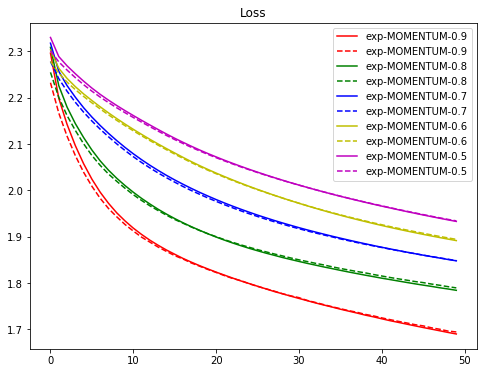

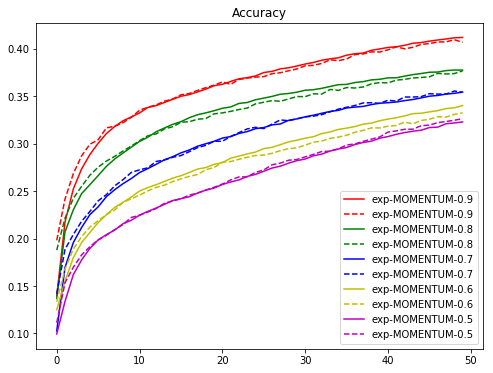

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results_WO_nesterov = {}
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Moment = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MOMENTUM-%s" % str(mo)
    results_WO_nesterov[exp_name_tag] = {'train-loss': train_loss,
                                         'valid-loss': valid_loss,
                                         'train-acc': train_acc,
                                         'valid-acc': valid_acc}

Experiment with Moment = 0.900000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.3083 - acc: 0.1360 - val_loss: 2.2640 - val_acc: 0.1699
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2428 - acc: 0.1865 - val_loss: 2.2230 - val_acc: 0.2016
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2066 - acc: 0.2133 - val_loss: 2.1898 - val_acc: 0.2249
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1752 - acc: 0.2324 - val_loss: 2.1596 - val_acc: 0.2380
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.1468 - acc: 0.2460 - val_loss: 2.1328 - val_acc: 0.2498
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 2.1210 - acc: 0.2557 - val_loss: 2.1081 - val_acc: 0.2589
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.0975 - acc: 0.2625 - val_loss: 2.0862 - 

Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.2684 - acc: 0.1523 - val_loss: 2.2565 - val_acc: 0.1622
Epoch 3/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.2417 - acc: 0.1725 - val_loss: 2.2324 - val_acc: 0.1804
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.2195 - acc: 0.1886 - val_loss: 2.2119 - val_acc: 0.2002
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.2004 - acc: 0.2039 - val_loss: 2.1940 - val_acc: 0.2141
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.1832 - acc: 0.2166 - val_loss: 2.1776 - val_acc: 0.2246
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.1673 - acc: 0.2262 - val_loss: 2.1621 - val_acc: 0.2334
Epoch 8/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.1523 - acc: 0.2354 - val_loss: 2.1476 - val_acc: 0.2405
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 137us/step - loss: 2.2517 - acc: 0.1627 - val_loss: 2.2385 - val_acc: 0.1741
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2299 - acc: 0.1820 - val_loss: 2.2180 - val_acc: 0.1972
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.2100 - acc: 0.1975 - val_loss: 2.1988 - val_acc: 0.2172
Epoch 6/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.1915 - acc: 0.2149 - val_loss: 2.1810 - val_acc: 0.2309
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1744 - acc: 0.2279 - val_loss: 2.1646 - val_acc: 0.2411
Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1585 - acc: 0.2382 - val_loss: 2.1494 - val_acc: 0.2478
Epoch 9/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1440 - acc: 0.2474 - val_loss: 2.1355 - val_acc: 0.2541
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 9s 182us/step - loss: 2.2476 - acc: 0.1682 - val_loss: 2.2377 - val_acc: 0.1805
Epoch 5/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.2339 - acc: 0.1837 - val_loss: 2.2248 - val_acc: 0.1950
Epoch 6/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.2213 - acc: 0.1962 - val_loss: 2.2127 - val_acc: 0.2056
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.2094 - acc: 0.2081 - val_loss: 2.2011 - val_acc: 0.2136
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.1981 - acc: 0.2151 - val_loss: 2.1900 - val_acc: 0.2202
Epoch 9/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1873 - acc: 0.2231 - val_loss: 2.1794 - val_acc: 0.2285
Epoch 10/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.1769 - acc: 0.2299 - val_loss: 2.1690 - val_acc: 0.2318
Epoch 11/50
50000/50000 [==================

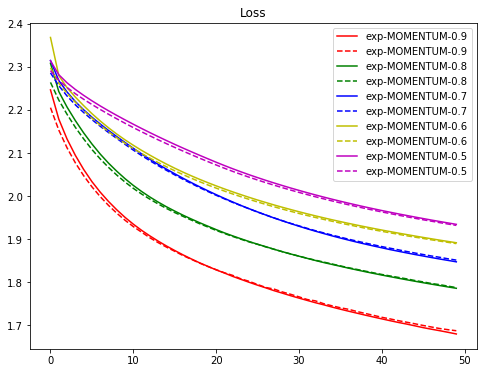

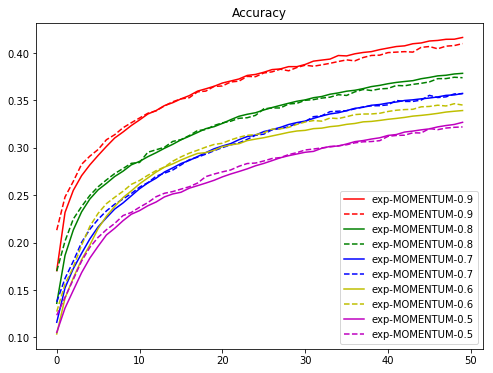

In [10]:
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results_WO_nesterov[cond]['train-loss'])),results_WO_nesterov[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_WO_nesterov[cond]['valid-loss'])),results_WO_nesterov[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results_WO_nesterov[cond]['train-acc'])),results_WO_nesterov[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_WO_nesterov[cond]['valid-acc'])),results_WO_nesterov[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()